In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%capture
!pip install numpy pandas streamlit gdown pyarrow

In [ ]:
import pandas as pd
nyc_data = pd.read_csv('/content/drive/MyDrive/Airbnb projects/Datasets/listings.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

In [ ]:
nyc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6998 entries, 0 to 6997
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6998 non-null   float64
 1   name                            6998 non-null   object 
 2   host_id                         6998 non-null   int64  
 3   host_name                       6998 non-null   object 
 4   neighbourhood_group             6960 non-null   object 
 5   neighbourhood                   6998 non-null   object 
 6   latitude                        6998 non-null   float64
 7   longitude                       6998 non-null   float64
 8   room_type                       6998 non-null   object 
 9   price                           6998 non-null   int64  
 10  minimum_nights                  6998 non-null   int64  
 11  number_of_reviews               6998 non-null   int64  
 12  last_review                     63

In [ ]:
nyc_data.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818.0,Quiet Garden View Room & Super Fast Wi-Fi,3159,Daniel,Osdorp,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69,3,322,28-02-2023,1.90,1,44,37,0363 5F3A 5684 6750 D14D
1,20168.0,Studio with private bathroom in the centre 1,59484,Alexander,Negen Straatjes,Centrum-Oost,52.36407,4.89393,Private room,106,1,339,09-04-2020,2.14,2,0,0,0363 CBB3 2C10 0C2A 1E29
2,27886.0,"Romantic, stylish B&B houseboat in canal district",97647,Flip,Zuidas,Centrum-West,52.38761,4.89188,Private room,143,3,248,26-02-2023,1.82,1,14,20,0363 974D 4986 7411 88D8
3,28871.0,Comfortable double room,124245,Edwin,Museum Quarter,Centrum-West,52.36775,4.89092,Private room,76,2,476,28-02-2023,3.12,2,79,97,0363 607B EA74 0BD8 2F6F
4,29051.0,Comfortable single room,124245,Edwin,Osdorp,Centrum-Oost,52.36584,4.89111,Private room,56,2,618,03-03-2023,4.23,2,69,85,0363 607B EA74 0BD8 2F6F
5,44391.0,Quiet 2-bedroom Amsterdam city centre apartment,194779,Jan,Negen Straatjes,Centrum-Oost,52.37168,4.91471,Entire home/apt,240,3,44,20-08-2022,0.29,1,0,3,0363 E76E F06A C1DD 172C
6,311124.0,*historic centre* *bright* *canal view* *jordaan*,1600010,Anke & Robert,Osdorp,Centrum-West,52.37104,4.87713,Entire home/apt,325,5,87,01-01-2023,0.66,1,346,3,0363 59D8 7D30 6CFA DC81
7,49552.0,Multatuli Luxury Guest Suite in top location,225987,Joanna & MP,Negen Straatjes,Centrum-West,52.38028,4.89089,Entire home/apt,257,3,462,23-02-2023,3.07,1,134,64,0363 576A D827 5085 6B83
8,729260.0,Great location modern apartment,3788198,Martin,Zuidas,Centrum-West,52.38079,4.88536,Entire home/apt,200,2,109,30-08-2021,0.87,1,102,0,0363 F6EF 50E3 40EB 1CFB
9,50263.0,Cent Adam Lux 2bed(4p) apt 125 sqm,230246,Donald,Museum Quarter,Centrum-Oost,52.37118,4.93146,Entire home/apt,395,4,163,03-05-2016,1.08,1,341,0,0363 7F3D 0BAE 28C8 C7D2


In [ ]:
nyc_data.isnull().sum()

id                                  0
name                                0
host_id                             0
host_name                           0
neighbourhood_group                38
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
last_review                       680
reviews_per_month                 660
calculated_host_listings_count      0
availability_365                    0
number_of_reviews_ltm               0
license                            24
dtype: int64

# EDA

Text(0.5, 1.0, 'Room Type vs Price')

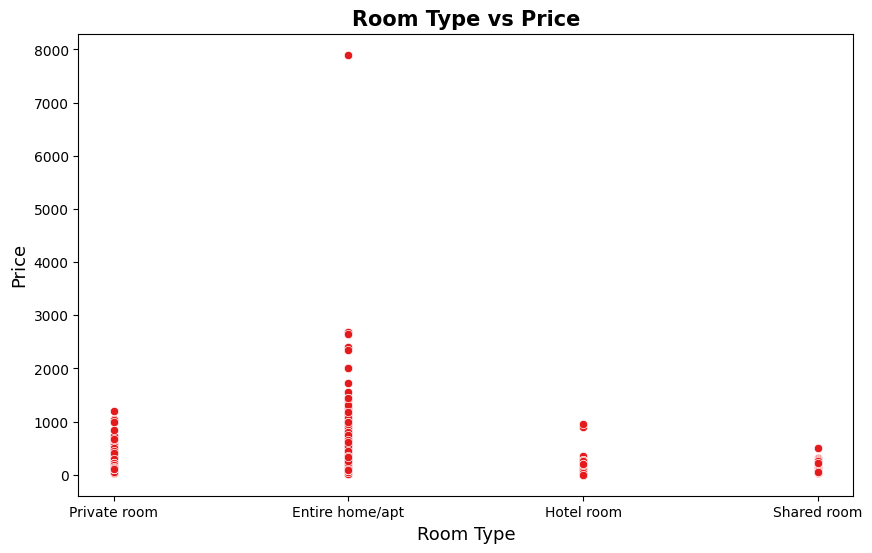

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='room_type', y='price', data=nyc_data)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price",size=15, weight='bold')

Text(0.5, 1.0, 'Room Type vs Price vs Neighbourhood Group')

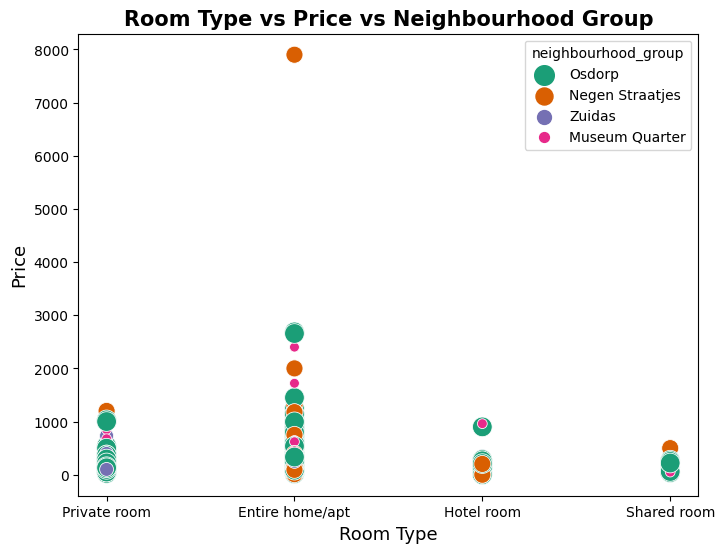

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="room_type", y="price",
            hue="neighbourhood_group", size="neighbourhood_group",
            sizes=(50, 200), palette="Dark2", data=nyc_data)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price vs Neighbourhood Group",size=15, weight='bold')

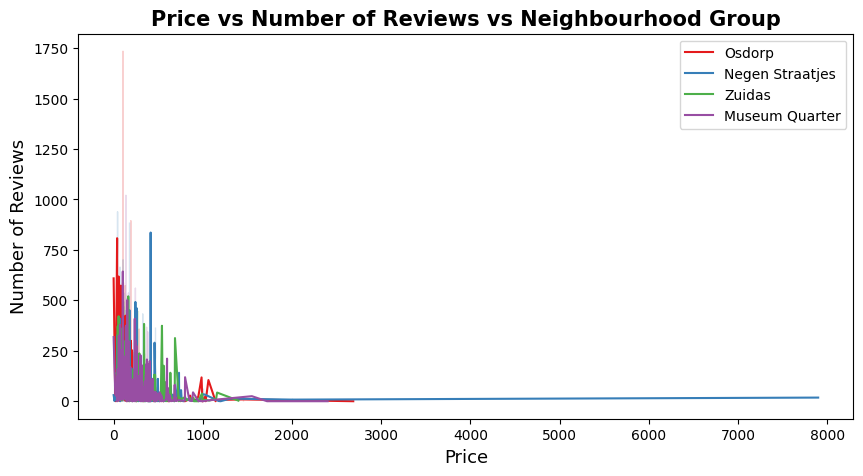

In [ ]:
plt.figure(figsize=(10,5))
sns.set_palette("Set1")

sns.lineplot(x='price', y='number_of_reviews',
             data=nyc_data[nyc_data['neighbourhood_group']=='Osdorp'],
             label='Osdorp')
sns.lineplot(x='price', y='number_of_reviews',
             data=nyc_data[nyc_data['neighbourhood_group']=='Negen Straatjes'],
             label='Negen Straatjes')
sns.lineplot(x='price', y='number_of_reviews',
             data=nyc_data[nyc_data['neighbourhood_group']=='Zuidas'],
             label='Zuidas')
sns.lineplot(x='price', y='number_of_reviews',
             data=nyc_data[nyc_data['neighbourhood_group']=='Museum Quarter'],
             label='Museum Quarter')

plt.xlabel("Price", size=13)
plt.ylabel("Number of Reviews", size=13)
plt.title("Price vs Number of Reviews vs Neighbourhood Group",size=15, weight='bold')
plt.show()

In [ ]:
nyc_data['neighbourhood_group']= nyc_data['neighbourhood_group'].astype("category").cat.codes
nyc_data['neighbourhood'] = nyc_data['neighbourhood'].astype("category").cat.codes
nyc_data['room_type'] = nyc_data['room_type'].astype("category").cat.codes
nyc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6998 entries, 0 to 6997
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6998 non-null   float64
 1   name                            6998 non-null   object 
 2   host_id                         6998 non-null   int64  
 3   host_name                       6998 non-null   object 
 4   neighbourhood_group             6998 non-null   int8   
 5   neighbourhood                   6998 non-null   int8   
 6   latitude                        6998 non-null   float64
 7   longitude                       6998 non-null   float64
 8   room_type                       6998 non-null   int8   
 9   price                           6998 non-null   int64  
 10  minimum_nights                  6998 non-null   int64  
 11  number_of_reviews               6998 non-null   int64  
 12  last_review                     63

<ipython-input-65-921f0c0b6456>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nyc_data['price'], fit=norm)


Text(0.5, 1.0, 'Price Distribution Plot')

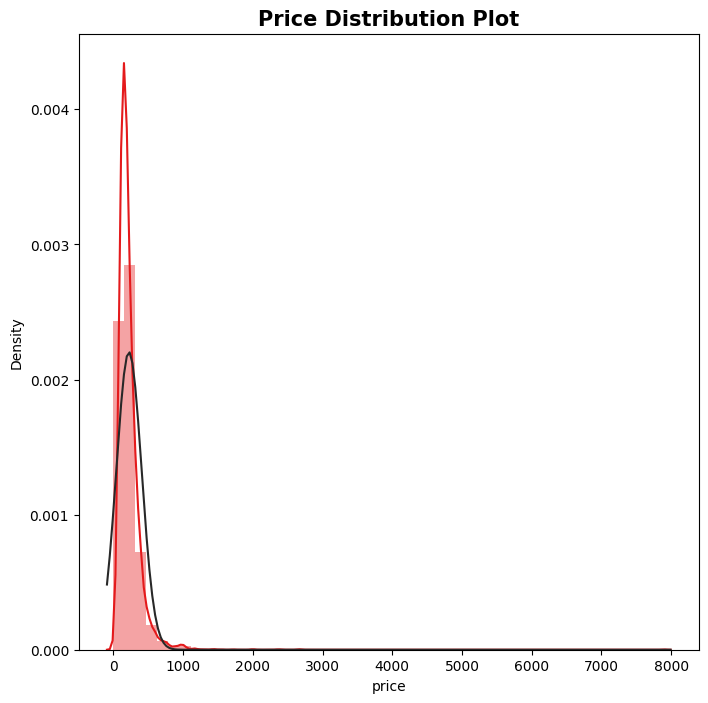

In [ ]:


plt.figure(figsize=(8,8))
sns.distplot(nyc_data['price'], fit=norm)
plt.title("Price Distribution Plot",size=15, weight='bold')

In [ ]:
nyc_data['price_log'] = np.log(nyc_data.price+1)

<ipython-input-67-f75c2561e77a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nyc_data['price_log'], fit=norm)


Text(0.5, 1.0, 'Log-Price Distribution Plot')

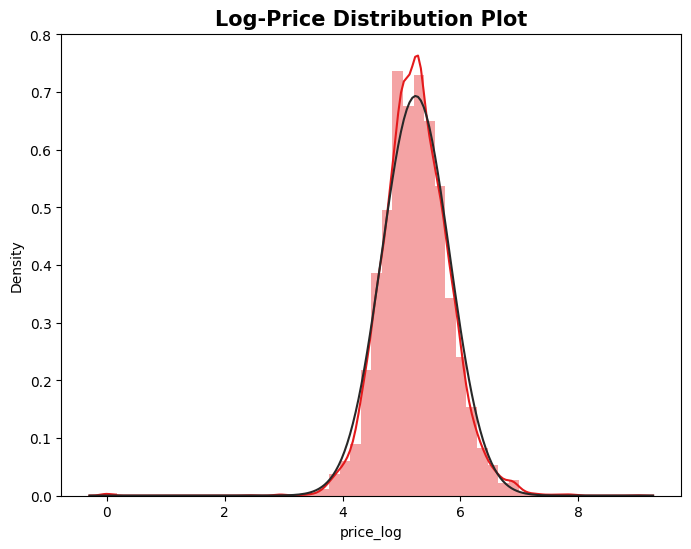

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(nyc_data['price_log'], fit=norm)
plt.title("Log-Price Distribution Plot",size=15, weight='bold')

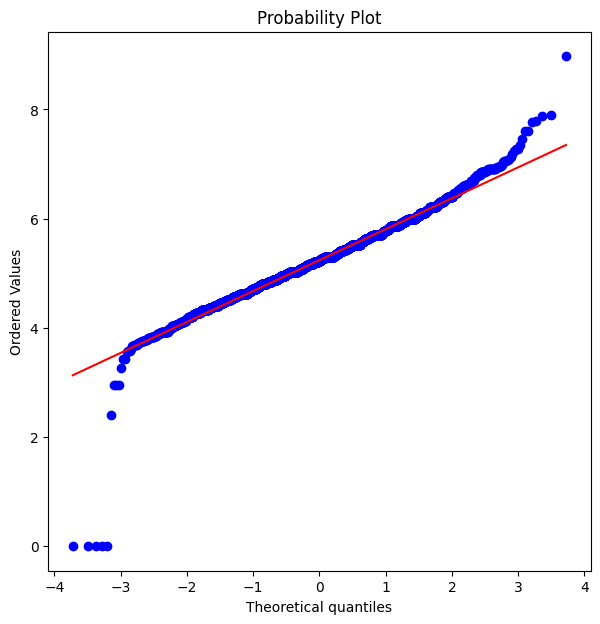

In [ ]:
plt.figure(figsize=(7,7))
stats.probplot(nyc_data['price_log'], plot=plt)
plt.show()

In [ ]:

nyc_model = nyc_data.drop(columns=['name','id' ,'host_id','host_name',
                                   'last_review','price','license'])
nyc_model.isnull().sum()

neighbourhood_group                 0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
minimum_nights                      0
number_of_reviews                   0
reviews_per_month                 660
calculated_host_listings_count      0
availability_365                    0
number_of_reviews_ltm               0
price_log                           0
dtype: int64

In [ ]:
mean = nyc_model['reviews_per_month'].mean()
nyc_model['reviews_per_month'].fillna(mean, inplace=True)
nyc_model.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
price_log                         0
dtype: int64

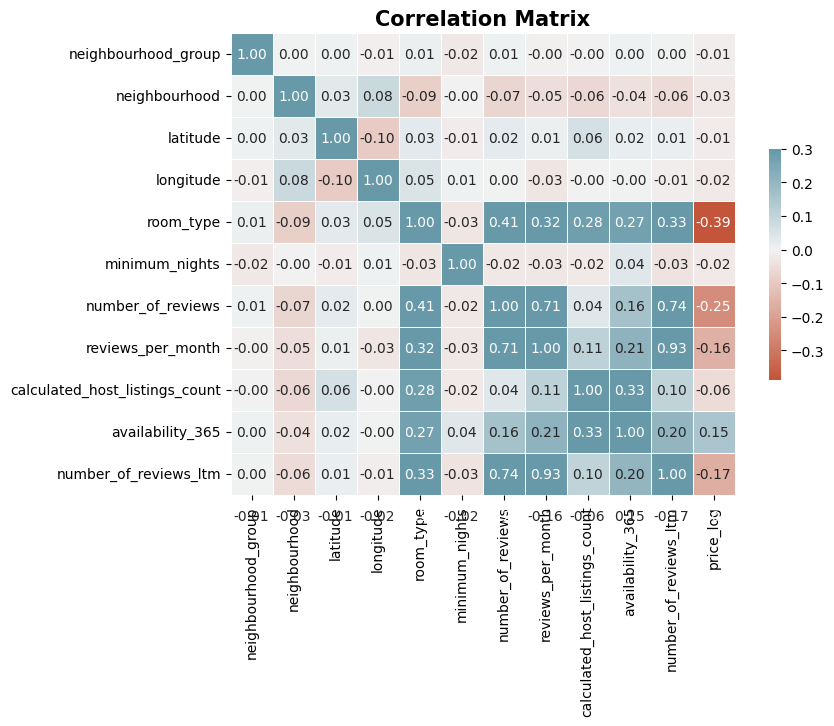

In [ ]:
plt.figure(figsize=(9,6))
palette = sns.diverging_palette(20, 220, n=256)
corr=nyc_model.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(ylim=(11, 0))
plt.title("Correlation Matrix",size=15, weight='bold')
plt.show()

# Multicolinearity


In [ ]:
#Eigen vector of a correlation matrix.
multicollinearity, V=np.linalg.eig(corr)
multicollinearity

array([3.02275578, 0.07286885, 0.30700436, 0.43990348, 0.64090299,
       1.35332284, 0.84322085, 1.18928868, 1.10300017, 0.9782133 ,
       1.0190727 , 1.03044599])

# Feature Selection and GridSearch

In [ ]:
nyc_model_x, nyc_model_y = nyc_model.iloc[:,:-1], nyc_model.iloc[:,-1]
print(nyc_model_x)


      neighbourhood_group  neighbourhood   latitude  longitude  room_type  \
0                       2             14  52.364350   4.943580          2   
1                       1              4  52.364070   4.893930          2   
2                       3              5  52.387610   4.891880          2   
3                       0              5  52.367750   4.890920          2   
4                       2              4  52.365840   4.891110          2   
...                   ...            ...        ...        ...        ...   
6993                    0              4  52.359386   4.893717          0   
6994                    0             16  52.401950   4.902256          0   
6995                    1             16  52.393502   4.899826          0   
6996                    3             19  52.351350   4.920430          0   
6997                    2             16  52.388888   4.922216          0   

      minimum_nights  number_of_reviews  reviews_per_month  \
0            

In [ ]:
scaler = StandardScaler()
nyc_model_x = scaler.fit_transform(nyc_model_x)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(nyc_model_x, nyc_model_y, test_size=0.2,random_state=42)

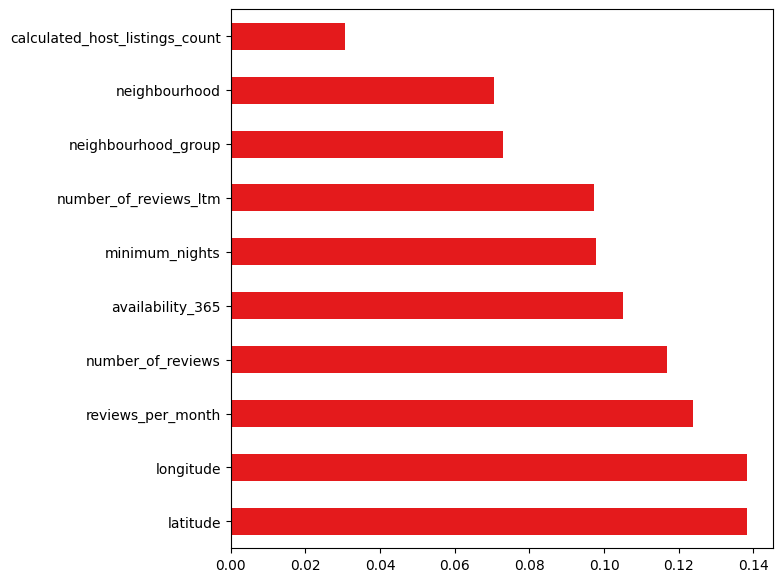

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing

lab_enc = preprocessing.LabelEncoder()

# Assuming X_train and y_train are my training data
# Make sure X_train and y_train are aligned correctly

feature_model = ExtraTreesClassifier(n_estimators=50)
feature_model.fit(X_train, lab_enc.fit_transform(y_train))

nyc_model_df = pd.DataFrame(nyc_model)  # Convert nyc_model to a DataFrame

# Select the corresponding columns from nyc_model_df for X_train
selected_columns = nyc_model_df.columns[:-1]
X_train_selected = pd.DataFrame(X_train, columns=nyc_model_df.columns[:-1])[selected_columns]

plt.figure(figsize=(7, 7))
feat_importances = pd.Series(
    feature_model.feature_importances_,
    index=selected_columns
)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [ ]:
print(len(nyc_model.iloc[:,:-1].columns))
print(len(feature_model.feature_importances_))


11
11


# Model Building


## Phase I - With all features

In [ ]:
### Linear Regression ###

def linear_reg(input_x, input_y, cv=5):
    ## Defining parameters
    model_LR= LinearRegression()

    parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_LR = GridSearchCV(estimator=model_LR,
                         param_grid=parameters,
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_LR.fit(input_x, input_y)
    best_parameters_LR = grid_search_LR.best_params_
    best_score_LR = grid_search_LR.best_score_
    print(best_parameters_LR)
    print(best_score_LR)


In [ ]:
### Ridge Regression ###

def ridge_reg(input_x, input_y, cv=5):
    ## Defining parameters
    model_Ridge= Ridge()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_Ridge = GridSearchCV(estimator=model_Ridge,
                         param_grid=(dict(alpha=alphas, normalize= normalizes)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_Ridge.fit(input_x, input_y)
    best_parameters_Ridge = grid_search_Ridge.best_params_
    best_score_Ridge = grid_search_Ridge.best_score_
    print(best_parameters_Ridge)
    print(best_score_Ridge)


In [ ]:
### Lasso Regression ###

def lasso_reg(input_x, input_y, cv=5):
    ## Defining parameters
    model_Lasso= Lasso()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_lasso = GridSearchCV(estimator=model_Lasso,
                         param_grid=(dict(alpha=alphas, normalize= normalizes)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_lasso.fit(input_x, input_y)
    best_parameters_lasso = grid_search_lasso.best_params_
    best_score_lasso = grid_search_lasso.best_score_
    print(best_parameters_lasso)
    print(best_score_lasso)


# lasso_reg(nyc_model_x, nyc_model_y)

In [ ]:
### ElasticNet Regression ###

def elastic_reg(input_x, input_y,cv=5):
    ## Defining parameters
    model_grid_Elastic= ElasticNet()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_elastic = GridSearchCV(estimator=model_grid_Elastic,
                         param_grid=(dict(alpha=alphas, normalize= normalizes)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_elastic.fit(input_x, input_y)
    best_parameters_elastic = grid_search_elastic.best_params_
    best_score_elastic = grid_search_elastic.best_score_
    print(best_parameters_elastic)
    print(best_score_elastic)

# elastic_reg(nyc_model_x, nyc_model_y)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

def random_forest_reg(input_x, input_y, cv=5):
    # Define parameters
    model_RF = RandomForestRegressor()

    parameters = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Build Grid Search algorithm with cross-validation and Mean Squared Error score
    grid_search_RF = GridSearchCV(estimator=model_RF,
                                  param_grid=parameters,
                                  scoring='neg_mean_squared_error',
                                  cv=cv,
                                  n_jobs=-1)

    # Find the best parameters
    grid_search_RF.fit(input_x, input_y)
    best_parameters_RF = grid_search_RF.best_params_
    best_score_RF = grid_search_RF.best_score_
    print(best_parameters_RF)
    print(best_score_RF)

# random_forest_reg(input_x, input_y)


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

def svm_reg(input_x, input_y, cv=5):
    # Define parameters
    model_SVM = SVR()

    parameters = {
        'kernel': ['linear', 'rbf'],
        'C': [0.1, 1, 10],
        'epsilon': [0.01, 0.1, 1]
    }

    # Build Grid Search algorithm with cross-validation and Mean Squared Error score
    grid_search_SVM = GridSearchCV(estimator=model_SVM,
                                   param_grid=parameters,
                                   scoring='neg_mean_squared_error',
                                   cv=cv,
                                   n_jobs=-1)

    # Find the best parameters
    grid_search_SVM.fit(input_x, input_y)
    best_parameters_SVM = grid_search_SVM.best_params_
    best_score_SVM = grid_search_SVM.best_score_
    print(best_parameters_SVM)
    print(best_score_SVM)

# svm_reg(input_x, input_y)


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

def xgboost_reg(input_x, input_y, cv=5):
    # Define parameters
    model_XGB = xgb.XGBRegressor()

    parameters = {
        'max_depth': [3, 6, 9],
        'learning_rate': [0.1, 0.01, 0.001],
        'n_estimators': [100, 200, 300],
        'reg_alpha': [0, 0.1, 0.5],
        'reg_lambda': [0, 0.1, 0.5]
    }

    # Build Grid Search algorithm with cross-validation and Mean Squared Error score
    grid_search_XGB = GridSearchCV(estimator=model_XGB,
                                   param_grid=parameters,
                                   scoring='neg_mean_squared_error',
                                   cv=cv,
                                   n_jobs=-1)

    # Find the best parameters
    grid_search_XGB.fit(input_x, input_y)
    best_parameters_XGB = grid_search_XGB.best_params_
    best_score_XGB = grid_search_XGB.best_score_
    print(best_parameters_XGB)
    print(best_score_XGB)

# xgboost_reg(input_x, input_y)


In [ ]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

def gradient_boost_reg(input_x, input_y, cv=5):
    # Define parameters
    model_GB = GradientBoostingRegressor()

    parameters = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.1, 0.01, 0.001],
        'max_depth': [3, 6, 9],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Build Grid Search algorithm with cross-validation and Mean Squared Error score
    grid_search_GB = GridSearchCV(estimator=model_GB,
                                  param_grid=parameters,
                                  scoring='neg_mean_squared_error',
                                  cv=cv,
                                  n_jobs=-1)

    # Find the best parameters
    grid_search_GB.fit(input_x, input_y)
    best_parameters_GB = grid_search_GB.best_params_
    best_score_GB = grid_search_GB.best_score_
    print(best_parameters_GB)
    print(best_score_GB)

# gradient_boost_reg(input_x, input_y)


K-Fold Cross Validation

In [ ]:
kfold_cv=KFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in kfold_cv.split(nyc_model_x,nyc_model_y):
    X_train, X_test = nyc_model_x[train_index], nyc_model_x[test_index]
    y_train, y_test = nyc_model_y[train_index], nyc_model_y[test_index]

Polynomial Transformation

In [ ]:
Poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train = Poly.fit_transform(X_train)
X_test = Poly.fit_transform(X_test)

# Model Prediction

In [ ]:
# Linear Regression
lr = LinearRegression(copy_X=True, fit_intercept=True)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Ridge Model
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(X_train, y_train)
pred_ridge = ridge_model.predict(X_test)

# Lasso Model
Lasso_model = Lasso(alpha=0.001)
Lasso_model.fit(X_train, y_train)
pred_Lasso = Lasso_model.predict(X_test)

# ElasticNet Model
model_enet = ElasticNet(alpha=0.01)
model_enet.fit(X_train, y_train)
pred_test_enet = model_enet.predict(X_test)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# SVM Regressor
svm = SVR(kernel='linear')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# XGBoost Regressor
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.446e+00, tolerance: 1.892e-01
  model = cd_fast.enet_coordinate_descent(


# Phase 2 - Without All Features

In [ ]:
nyc_model_xx= nyc_model.drop(columns=['neighbourhood_group', 'room_type'])

In [ ]:
nyc_model_xx, nyc_model_yx = nyc_model_xx.iloc[:,:-1], nyc_model_xx.iloc[:,-1]
X_train_x, X_test_x, y_train_x, y_test_x = train_test_split(nyc_model_xx, nyc_model_yx, test_size=0.3,random_state=42)

In [ ]:

scaler = StandardScaler()
nyc_model_xx = scaler.fit_transform(nyc_model_xx)

K-Fold Cross Validation

In [ ]:
kfold_cv=KFold(n_splits=4, random_state=42, shuffle=True)
for train_index, test_index in kfold_cv.split(nyc_model_xx,nyc_model_yx):
    X_train_x, X_test_x = nyc_model_xx[train_index], nyc_model_xx[test_index]
    y_train_x, y_test_x = nyc_model_yx[train_index], nyc_model_yx[test_index]

Polynomial Transformation

In [ ]:
Poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_x = Poly.fit_transform(X_train_x)
X_test_x = Poly.fit_transform(X_test_x)

# Model Prediction

In [ ]:
###Linear Regression
lr_x = LinearRegression(copy_X= True, fit_intercept = True)
lr_x.fit(X_train_x, y_train_x)
lr_pred_x= lr_x.predict(X_test_x)

###Ridge
ridge_x = Ridge(alpha = 0.01)
ridge_x.fit(X_train_x, y_train_x)
pred_ridge_x = ridge_x.predict(X_test_x)

###Lasso
Lasso_x = Lasso(alpha = 0.001)
Lasso_x.fit(X_train_x, y_train_x)
pred_Lasso_x = Lasso_x.predict(X_test_x)

##ElasticNet
model_enet_x = ElasticNet(alpha = 0.01)
model_enet_x.fit(X_train_x, y_train_x)
pred_train_enet_x= model_enet_x.predict(X_train_x)
pred_test_enet_x= model_enet_x.predict(X_test_x)

# Random Forest Regressor
rf_x = RandomForestRegressor(n_estimators=100)
rf_x.fit(X_train_x, y_train_x)
pred_rf_x = rf_x.predict(X_test_x)

# SVM Regressor
svm_x = SVR(kernel='linear')
svm_x.fit(X_train_x, y_train_x)
pred_svm_x = svm_x.predict(X_test_x)

# XGBoost Regressor
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train_x, y_train_x)
xgb_pred_x = xgb_model.predict(X_test_x)

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train_x, y_train_x)
gb_pred_x = gb_model.predict(X_test_x)

# Model Comparison
In this part, 3 metrics will be calculated for evaluating predictions.

Mean Absolute Error (MAE) shows the difference between predictions and actual values.

Root Mean Square Error (RMSE) shows how accurately the model predicts the response.

R^2 will be calculated to find the goodness of fit measure.

In [ ]:
print('-------------Lineer Regression-----------')

print('--Phase-1--')
print('MAE: %f'% mean_absolute_error(y_test, lr_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, lr_pred)))
print('R2 %f' % r2_score(y_test, lr_pred))

print('--Phase-2--')
print('MAE: %f'% mean_absolute_error(y_test_x, lr_pred_x))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test_x, lr_pred_x)))
print('R2 %f' % r2_score(y_test_x, lr_pred_x))

print('---------------Ridge ---------------------')

print('--Phase-1--')
print('MAE: %f'% mean_absolute_error(y_test, pred_ridge))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, pred_ridge)))
print('R2 %f' % r2_score(y_test, pred_ridge))

print('--Phase-2--')
print('MAE: %f'% mean_absolute_error(y_test_x, pred_ridge_x))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test_x, pred_ridge_x)))
print('R2 %f' % r2_score(y_test_x, pred_ridge_x))

print('---------------Lasso-----------------------')

print('--Phase-1--')
print('MAE: %f' % mean_absolute_error(y_test, pred_Lasso))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, pred_Lasso)))
print('R2 %f' % r2_score(y_test, pred_Lasso))

print('--Phase-2--')
print('MAE: %f' % mean_absolute_error(y_test_x, pred_Lasso_x))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test_x, pred_Lasso_x)))
print('R2 %f' % r2_score(y_test_x, pred_Lasso_x))

print('---------------ElasticNet-------------------')

print('--Phase-1 --')
print('MAE: %f' % mean_absolute_error(y_test,pred_test_enet)) #RMSE
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test,pred_test_enet))) #RMSE
print('R2 %f' % r2_score(y_test, pred_test_enet))

print('--Phase-2--')
print('MAE: %f' % mean_absolute_error(y_test_x,pred_test_enet_x)) #RMSE
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test_x,pred_test_enet_x))) #RMSE
print('R2 %f' % r2_score(y_test_x, pred_test_enet_x))

print('-------------Random Forest-----------')

print('--Phase-1--')
print('MAE: %f'% mean_absolute_error(y_test, rf_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, rf_pred)))
print('R2 %f' % r2_score(y_test, rf_pred))

print('--Phase-2--')
print('MAE: %f'% mean_absolute_error(y_test_x, pred_rf_x))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test_x, pred_rf_x)))
print('R2 %f' % r2_score(y_test_x, pred_rf_x))


print('-------------SVM-----------')

print('--Phase-1--')
print('MAE: %f'% mean_absolute_error(y_test, svm_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, svm_pred)))
print('R2 %f' % r2_score(y_test, svm_pred))

print('--Phase-2--')
print('MAE: %f'% mean_absolute_error(y_test_x, pred_svm_x))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test_x, pred_svm_x)))
print('R2 %f' % r2_score(y_test_x, pred_svm_x))


print('-------------XGBoost-----------')

print('--Phase-1--')
print('MAE: %f'% mean_absolute_error(y_test, xgb_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, xgb_pred)))
print('R2 %f' % r2_score(y_test, xgb_pred))

print('--Phase-2--')
print('MAE: %f'% mean_absolute_error(y_test_x, xgb_pred_x))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test_x, xgb_pred_x)))
print('R2 %f' % r2_score(y_test_x, xgb_pred_x))


print('-------------Gradient Boosting-----------')

print('--Phase-1--')
print('MAE: %f'% mean_absolute_error(y_test, gb_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, gb_pred)))
print('R2 %f' % r2_score(y_test, gb_pred))

print('--Phase-2--')
print('MAE: %f'% mean_absolute_error(y_test_x, gb_pred_x))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test_x, gb_pred_x)))
print('R2 %f' % r2_score(y_test_x, gb_pred_x))




-------------Lineer Regression-----------
--Phase-1--
MAE: 0.361254
RMSE: 0.471189
R2 0.268246
--Phase-2--
MAE: 0.398335
RMSE: 0.684365
R2 -0.559083
---------------Ridge ---------------------
--Phase-1--
MAE: 0.361254
RMSE: 0.471191
R2 0.268240
--Phase-2--
MAE: 0.398333
RMSE: 0.684351
R2 -0.559018
---------------Lasso-----------------------
--Phase-1--
MAE: 0.361901
RMSE: 0.471752
R2 0.266497
--Phase-2--
MAE: 0.396604
RMSE: 0.646357
R2 -0.390714
---------------ElasticNet-------------------
--Phase-1 --
MAE: 0.362146
RMSE: 0.471629
R2 0.266880
--Phase-2--
MAE: 0.391534
RMSE: 0.560816
R2 -0.046969
-------------Random Forest-----------
--Phase-1--
MAE: 0.329670
RMSE: 0.434365
R2 0.378151
--Phase-2--
MAE: 0.347168
RMSE: 0.457961
R2 0.301849
-------------SVM-----------
--Phase-1--
MAE: 0.363690
RMSE: 0.495987
R2 0.189196
--Phase-2--
MAE: 0.402813
RMSE: 0.796920
R2 -1.114085
-------------XGBoost-----------
--Phase-1--
MAE: 0.340510
RMSE: 0.455968
R2 0.314758
--Phase-2--
MAE: 0.371506
RMSE: 0

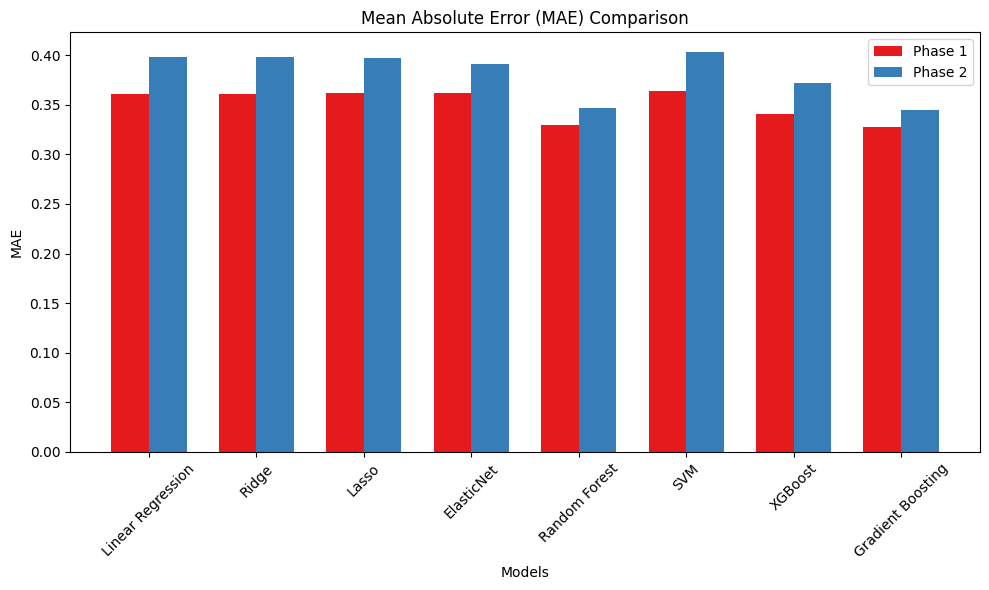

In [ ]:
import matplotlib.pyplot as plt

# Evaluation metrics
phase1_mae = [mean_absolute_error(y_test, lr_pred), mean_absolute_error(y_test, pred_ridge),
              mean_absolute_error(y_test, pred_Lasso), mean_absolute_error(y_test, pred_test_enet),
              mean_absolute_error(y_test, rf_pred), mean_absolute_error(y_test, svm_pred),
              mean_absolute_error(y_test, xgb_pred), mean_absolute_error(y_test, gb_pred)]

phase2_mae = [mean_absolute_error(y_test_x, lr_pred_x), mean_absolute_error(y_test_x, pred_ridge_x),
              mean_absolute_error(y_test_x, pred_Lasso_x), mean_absolute_error(y_test_x, pred_test_enet_x),
              mean_absolute_error(y_test_x, pred_rf_x), mean_absolute_error(y_test_x, pred_svm_x),
              mean_absolute_error(y_test_x, xgb_pred_x), mean_absolute_error(y_test_x, gb_pred_x)]

# Plotting bar graph
labels = ['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet', 'Random Forest', 'SVM', 'XGBoost', 'Gradient Boosting']
x = range(len(labels))

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35

rects1 = ax.bar(x, phase1_mae, bar_width, label='Phase 1')
rects2 = ax.bar([i + bar_width for i in x], phase2_mae, bar_width, label='Phase 2')

ax.set_xlabel('Models')
ax.set_ylabel('MAE')
ax.set_title('Mean Absolute Error (MAE) Comparison')
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(labels)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


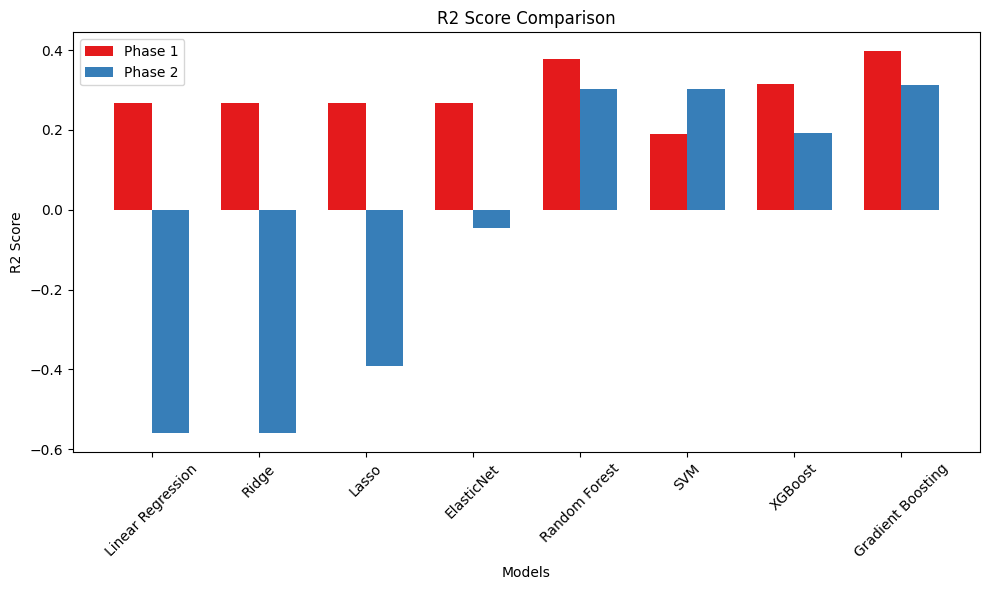

In [ ]:
import matplotlib.pyplot as plt

# Evaluation metrics
phase1_r2 = [r2_score(y_test, lr_pred), r2_score(y_test, pred_ridge),
              r2_score(y_test, pred_Lasso), r2_score(y_test, pred_test_enet),
              r2_score(y_test, rf_pred), r2_score(y_test, svm_pred),
              r2_score(y_test, xgb_pred), r2_score(y_test, gb_pred)]

phase2_r2 = [r2_score(y_test_x, lr_pred_x), r2_score(y_test_x, pred_ridge_x),
              r2_score(y_test_x, pred_Lasso_x), r2_score(y_test_x, pred_test_enet_x),
              r2_score(y_test_x, pred_rf_x), r2_score(y_test_x, pred_rf_x),
              r2_score(y_test_x, xgb_pred_x), r2_score(y_test_x, gb_pred_x)]

# Plotting bar graph
labels = ['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet', 'Random Forest', 'SVM', 'XGBoost', 'Gradient Boosting']
x = range(len(labels))

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35

rects1 = ax.bar(x, phase1_r2, bar_width, label='Phase 1')
rects2 = ax.bar([i + bar_width for i in x], phase2_r2, bar_width, label='Phase 2')

ax.set_xlabel('Models')
ax.set_ylabel('R2 Score')
ax.set_title('R2 Score Comparison')
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(labels)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

def gradient_boost_reg(input_x, input_y, cv=5):
    # Define parameters
    model_GB = GradientBoostingRegressor()

    parameters = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.1, 0.01, 0.001],
        'max_depth': [3, 6, 9],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Build Grid Search algorithm with cross-validation and Mean Squared Error score
    grid_search_GB = GridSearchCV(estimator=model_GB,
                                  param_grid=parameters,
                                  scoring='neg_mean_squared_error',
                                  cv=cv,
                                  n_jobs=-1)

    # Find the best parameters
    grid_search_GB.fit(input_x, input_y)
    best_parameters_GB = grid_search_GB.best_params_
    best_score_GB = grid_search_GB.best_score_

    # Get the best model
    best_model_GB = grid_search_GB.best_estimator_

    # Save the best model using joblib
    joblib.dump(best_model_GB, 'best_model_gb.pkl')

    return best_model_GB


In [ ]:
best_gb_model = gradient_boost_reg(nyc_model_x, nyc_model_y)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

def random_gradient_boost_reg(input_x, input_y, cv=5, n_iter=100):
    # Define parameters
    model_GB = GradientBoostingRegressor()

    parameters = {
        'n_estimators': np.arange(100, 501, 50),
        'learning_rate': [0.1, 0.01, 0.001],
        'max_depth': np.arange(3, 10),
        'min_samples_split': np.arange(2, 11),
        'min_samples_leaf': np.arange(1, 5)
    }

    # Build Randomized Search algorithm with cross-validation and Mean Squared Error score
    randomized_search_GB = RandomizedSearchCV(estimator=model_GB,
                                              param_distributions=parameters,
                                              scoring='neg_mean_squared_error',
                                              cv=cv,
                                              n_iter=n_iter,
                                              n_jobs=-1,
                                              random_state=42)

    # Find the best parameters
    randomized_search_GB.fit(input_x, input_y)
    best_parameters_GB = randomized_search_GB.best_params_
    best_score_GB = randomized_search_GB.best_score_
    best_model_GB = randomized_search_GB.best_estimator_

    return best_model_GB, best_parameters_GB, best_score_GB

# Call the function for Randomized Search
best_gb_model, best_params_gb, best_score_gb = random_gradient_boost_reg(nyc_model_x, nyc_model_y, n_iter=100)
